In [102]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## 1. data load

In [103]:
# fire = pd.read_excel(r'D:\vscode\RhombusPower\data\fire.xlsx')
# singlefire = pd.read_excel(r'D:\vscode\RhombusPower\data\singleFire.xlsx')
# assess_value = pd.read_excel(r'D:\vscode\RhombusPower\data\assess_value.xlsx')

fire = pd.read_excel(r'C:\vscode_psb\liveCodingTest\data\fire.xlsx')
singlefire = pd.read_excel(r'C:\vscode_psb\liveCodingTest\data\singleFire.xlsx')
assess_value = pd.read_excel(r'C:\vscode_psb\liveCodingTest\data\assess_value.xlsx')

## 2. data preprocesing

### date

In [3]:
to_date = ['Updated', 'Started', 'ExtinguishedDate', 'ExtinguishedDateOnly', 'StartedDateOnly']

def time_convert(time):
    if time == '':
        return np.nan
    else:
        return datetime.fromtime

for col in to_date:
    singlefire[col] = singlefire[col].apply(lambda x: int(x[6:-2]/1000))
# -로 시작하면 np.nan으로 넣을 거임.
# if date_num
# +로 시작하며 시분초까지 반영해서 설정
singlefire
# singlefire.info()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [104]:
# miliseconds -> YYYYMMDD

to_date2 = ['Updated', 'Started', 'ExtinguishedDate', 'ExtinguishedDateOnly', 'StartedDateOnly', 'ExpectedContainment']

def date_convert(x):
    if pd.isna(x) or x =="":
        return np.nan
    else:
        return datetime.fromtimestamp(x)

for col in to_date2:
    singlefire[col] = singlefire[col].apply(lambda x: int(x[6:-2])//1000)
    singlefire[col] = singlefire[col].replace(singlefire[singlefire[col] < 0][col].unique(), np.nan)
    singlefire[col] = singlefire[col].apply(date_convert)
singlefire['Name'] = singlefire['Name'].apply(lambda x: x.strip())
singlefire

,Name,Final,Updated,Started,AdminUnit,AdminUnitUrl,County,Counties,Location,AcresBurned,...,Agencies,UnifiedCommandAgencies,mapZoom,AdditionalInfo,IncidentCameras,CameraString,Photos,MapUrl3D,DemographicsReportUrl,AdditionalIncidentMapsUrl
0,Sierra Fire,True,2006-02-13 03:00:00,2006-02-06 13:30:00,USFS/Orange County Fire,NaN,NaN,"['Orange', 'Riverside']",Corona/Orange,10584.0,...,"[{'Name': 'USFS/Orange County Fire', 'AgencyUR...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
1,Arrastre Fire,True,2006-06-10 00:33:00,2006-06-09 21:51:00,San Bernardino National Forest,NaN,NaN,['San Bernardino'],6 miles east of Big Bear City,361.0,...,"[{'Name': 'San Bernardino National Forest', 'A...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
2,Plunge Fire,True,2006-06-20 00:38:00,2006-01-23 21:32:00,San Bernardino National Forest,NaN,NaN,['San Bernardino'],2-3 miles south of Running Spring,485.0,...,"[{'Name': 'San Bernardino National Forest', 'A...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
3,Perkins Fire,True,2006-06-26 04:00:00,2006-06-20 00:18:00,Los Padres National Forest,NaN,NaN,['Santa Barbara'],South of the community of New,15043.0,...,"[{'Name': 'Los Padres National Forest', 'Agenc...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
4,Del Puerto Fire,True,2003-07-24 16:00:00,2003-07-20 19:08:00,CDF Santa Clara Unit,NaN,NaN,['Stanislaus'],Del Puerto Canyon Road/MP 16,5909.0,...,"[{'Name': 'CDF Santa Clara Unit', 'AgencyURL':...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,Butter Fire,False,2025-08-27 05:51:45,2025-08-26 20:32:46,Bureau of Land Management - California Desert ...,NaN,NaN,['Kern'],"Butterbredt Canyon Road, East of Pacific Crest...",48.0,...,[],[],12,[],NaN,NaN,[],NaN,NaN,NaN
4009,Grade Fire,False,2025-08-27 15:11:33,2025-08-26 23:34:57,CAL FIRE Siskiyou Unit,NaN,NaN,['Siskiyou'],"West Lava Rim Road, Pondosa",10.0,...,[],[],12,[],NaN,NaN,[],NaN,NaN,NaN
4010,3-27 Fire,False,2025-08-27 07:02:17,2025-08-27 00:24:02,CAL FIRE Lassen-Modoc Unit,NaN,NaN,['Lassen'],"Southeast of Pumpkin Center, Bieber",24.0,...,[],[],12,[],NaN,NaN,[],NaN,NaN,NaN
4011,H-10 Fire,False,2025-08-27 05:49:40,2025-08-26 19:05:50,Lassen National Forest,NaN,NaN,['Shasta'],"Forest Road 36N18 & Butte Creek, Hat Creek",10.6,...,[],[],12,[],NaN,NaN,[],NaN,NaN,NaN


## Problem

### (1) total number of unique wildfire incidents

In [105]:
print(f'total number of unique fire occured: {len(fire)}')

total number of unique fire occured: 4013


### (2) cumulative total area (in Acres) burned by all wildfires

In [106]:
burned_total = sum(fire['AcresBurned'])
print(f'Total acres burned: {burned_total} Acres')

Total acres burned: 16644353.53 Acres


### (3)
For each incident, calculate the fire duration in days using the 'Extinguished' and 'Started' dates. Calculate the mean, median, 25th percentile, and 75th percentile of the duration.

In [21]:
fire

,Name,Updated,Started,AdminUnit,County,Location,AcresBurned,PercentContained,Longitude,Latitude,Type,UniqueId,Url,StartedDateOnly,IsActive,ExternalUrl
0,Sierra Fire,2006-02-12,2006-02-06,USFS/Orange County Fire,"Orange,Riverside",Corona/Orange,10584.0,100,0.000000,0.000000,NaN,7bc3e973-7c13-4e62-926a-c6d25d4fa426,/incidents/2006/2/6/sierra-fire/,NaN,False,NaN
1,Arrastre Fire,2006-06-09,2006-06-09,San Bernardino National Forest,San Bernardino,6 miles east of Big Bear City,361.0,100,0.000000,0.000000,NaN,8e7f4ac2-1628-4263-97d9-3c8d9da126e3,/incidents/2006/6/9/arrastre-fire/,NaN,False,NaN
2,Plunge Fire,2006-06-19,2006-01-23,San Bernardino National Forest,San Bernardino,2-3 miles south of Running Spring,485.0,100,0.000000,0.000000,NaN,16d75336-a2e0-4dc0-b894-873e80e3db9f,/incidents/2006/1/23/plunge-fire/,NaN,False,NaN
3,Perkins Fire,2006-06-25,2006-06-19,Los Padres National Forest,Santa Barbara,South of the community of New,15043.0,100,0.000000,0.000000,NaN,9f2d8497-ffff-4d8e-a0ac-38a340fef8ab,/incidents/2006/6/19/perkins-fire/,NaN,False,NaN
4,Del Puerto Fire,2003-07-24,2003-07-20,CDF Santa Clara Unit,Stanislaus,Del Puerto Canyon Road/MP 16,5909.0,100,0.000000,0.000000,NaN,472b6bb1-1cf3-4157-810b-6f298ba3f938,/incidents/2006/7/20/del-puerto-fire/,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,Tornado Fire,2025-09-11,2025-09-10,CAL FIRE Riverside Unit,Riverside,"Tornado and Santa Rosa Road, West of Temecula",12.0,100,-117.170723,33.473554,Wildfire,4591cb85-cb46-4af4-a772-ae36ab73c07e,/incidents/2025/9/10/tornado-fire/,NaN,False,NaN
4086,Boggs Fire,2025-09-11,2025-09-10,CAL FIRE Tehama Glenn Unit,Tehama,"Boggs and Champlin Road, Northwest of Corning",88.0,100,-122.398034,39.962679,Wildfire,06477093-53c9-4ee7-9883-18a739be764a,/incidents/2025/9/10/boggs-fire/,NaN,False,NaN
4087,Buell Fire,2025-09-12,2025-09-10,CAL FIRE Shasta-Trinity Unit,Shasta,Platina Road and Buell Road,13.0,100,-122.619388,40.474673,Wildfire,a1f25049-f72b-455b-9fc3-1a9f0a5fa3f6,/incidents/2025/9/10/buell-fire/,NaN,False,NaN
4088,Elephant Fire,2025-09-11,2025-09-11,Sequoia National Forest,Tulare,"Lloyd Meadow Road, North of Johnsondale",10.4,0,-118.486880,35.995530,Wildfire,0491500f-f692-4f2b-8ea4-6cef3134d875,/incidents/2025/9/11/elephant-fire/,NaN,True,NaN


### (4)
Calculate the mean and median of AcresBurned. Discuss why the two values are different and what this suggests about the distribution of wildfire sizes. If the mean is significantly larger than the median, it may indicate that most wildfires are small, but a few very large fires are heavily skewing the overall average. This shows that wildfire damage tends to be driven by extreme events.

In [107]:
print('Mean of AcresBurned:', np.mean(singlefire['AcresBurned']))
print('Median of AcresBurned:', np.median(singlefire['AcresBurned']))

Mean of AcresBurned: 4147.638058808871
Median of AcresBurned: 88.0


## 1.2. County-Level Economic Profiling

In [20]:
assess_recent = assess_value[assess_value['AssessmentYearTo'] == 2025]
assess_recent.head(5)

,AssessmentYearFrom,AssessmentYearTo,County,LandAssessedValue,ImprovementsAssessedValue,PersonalPropertyAssessedValue,Exemptions,NetTotal,YearToYearChange
1393,2024,2025,Alameda,128982717000,291166740000,15699871000,14484785000,421364543000,4.9
1394,2024,2025,Alpine,272852000,638965000,17065000,1162000,927722000,3.5
1395,2024,2025,Amador,2338182000,4563550000,163097000,210883000,6853946000,3.5
1396,2024,2025,Butte,10656078000,18556261000,1095352000,1754154000,28553536000,2.8
1397,2024,2025,Calaveras,2429436000,7624119000,192703000,178008000,10068249000,4.3


In [ ]:
def merge_counties(counties: list):
    if len(counties) == 0:
        return np.nan
    else:
        pass

### (1)
Based on the most recent year available in the dataset, identify the top 5 and bottom 5 counties by NetTotal (net total assessed value)

In [24]:
assess_recent = assess_recent.sort_values('NetTotal', ascending=False)
assess_recent_top5 = assess_recent[:5]
assess_recent_bottom5 = assess_recent[-5:]
print(f"Top 5:")
print(f"{[c for c in assess_recent_top5['County']]}")
print(f"Bottom 5:")
print(f"{[c for c in assess_recent_bottom5['County']]}")

Top 5:
['Los Angeles', 'Orange', 'San Diego', 'Santa Clara', 'Riverside']
Bottom 5:
['Del Norte', 'Trinity', 'Modoc', 'Alpine', 'Sierra']


### (2)
Calculate the average YearToYearChange for all counties over the entire period of the dataset. Is the overall trend positive or negative?

In [25]:
assess_value

,AssessmentYearFrom,AssessmentYearTo,County,LandAssessedValue,ImprovementsAssessedValue,PersonalPropertyAssessedValue,Exemptions,NetTotal,YearToYearChange
0,2000,2001,Alameda,34717087000,70021609000,7274160000,2885547000,109127309000,10.0
1,2000,2001,Alpine,101844000,165528000,6247000,478000,273141000,11.0
2,2000,2001,Amador,808762000,1470829000,88822000,55920000,2312493000,5.7
3,2000,2001,Butte,3523141000,6326376000,621729000,390854000,10080393000,5.3
4,2000,2001,Calaveras,1105378000,2079017000,73226000,24224000,3233397000,6.2
...,...,...,...,...,...,...,...,...,...
1446,2024,2025,Tulare,12943257000,35892662000,2774381000,1416897000,50193403000,8.4
1447,2024,2025,Tuolumne,2873980000,6807448000,367535000,336373000,9712590000,4.8
1448,2024,2025,Ventura,91256113000,88647860000,5437273000,5252939000,180088307000,4.3
1449,2024,2025,Yolo,11526486000,27668861000,1307208000,2311724000,38190830000,5.1


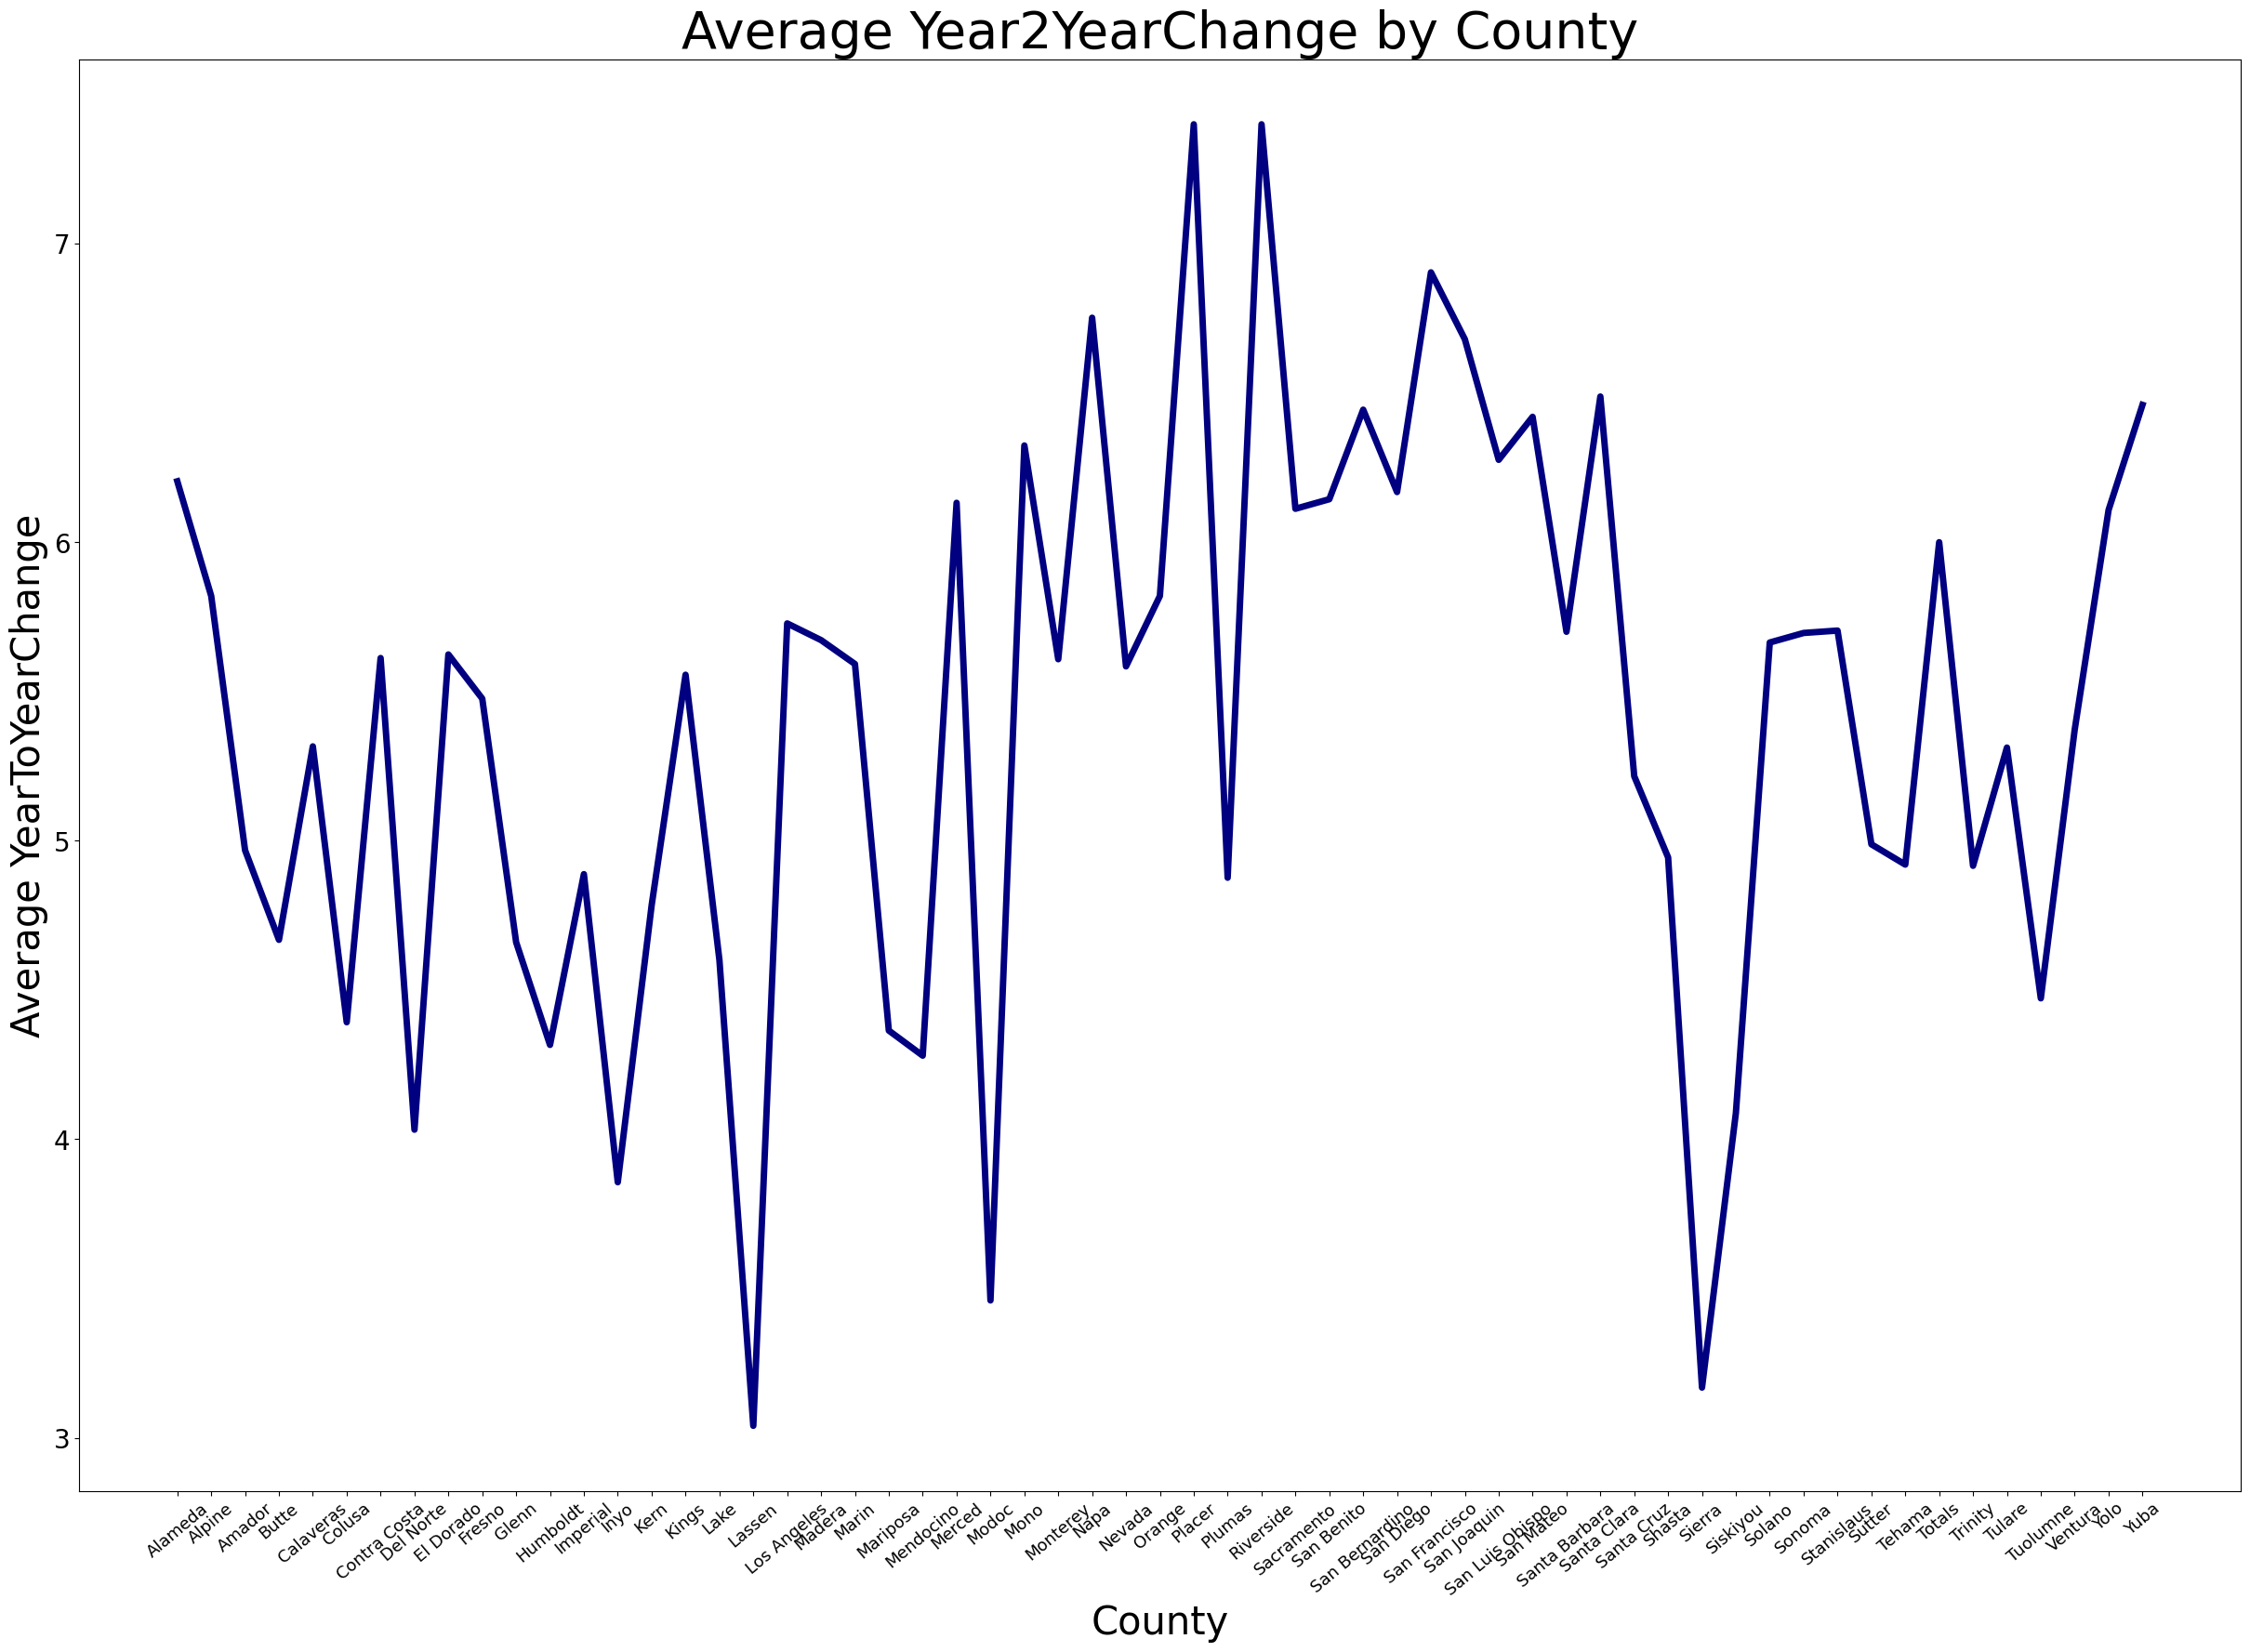

In [49]:
ytyc_county = assess_value.groupby('County')['YearToYearChange'].mean()

plt.figure(figsize=(30,20))
plt.plot(ytyc_county, color='navy', linewidth=5)
plt.xlabel('County', fontsize=30)
plt.ylabel('Average YearToYearChange', fontsize=30)
plt.xticks(rotation=40, fontsize=13)
plt.yticks(fontsize=20)
plt.title('Average Year2YearChange by County', fontsize=40)
plt.show()

### (3)
Create a new column called ImprovementRatio using the formula ImprovementsAssessedValue / (LandAssessedValue + ImprovementsAssessedValue). Identify the top 5 counties with the highest average ImprovementRatio over the last five years.

In [47]:
assess_value.head()

,AssessmentYearFrom,AssessmentYearTo,County,LandAssessedValue,ImprovementsAssessedValue,PersonalPropertyAssessedValue,Exemptions,NetTotal,YearToYearChange
0,2000,2001,Alameda,34717087000,70021609000,7274160000,2885547000,109127309000,10.0
1,2000,2001,Alpine,101844000,165528000,6247000,478000,273141000,11.0
2,2000,2001,Amador,808762000,1470829000,88822000,55920000,2312493000,5.7
3,2000,2001,Butte,3523141000,6326376000,621729000,390854000,10080393000,5.3
4,2000,2001,Calaveras,1105378000,2079017000,73226000,24224000,3233397000,6.2


In [58]:
assess_value['ImprovementRatio'] = assess_value['ImprovementsAssessedValue'] / (assess_value['LandAssessedValue'] + assess_value['ImprovementsAssessedValue'])
aValue_ratio = assess_value.groupby('County')['ImprovementRatio'].mean()
aValue_ratio[:5]
print('Top5')
print(f"{[c for c in aValue_ratio[:5].index]}")

Top5
['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras']


## 1.3 Identifying Geographical Hotspots

### (1)
Group the wildfire incident data by County to calculate the total number of fire incidents
and the total AcresBurned for each county.

In [131]:
def str_2_list(x):
    return eval(x)

singlefire_copy = singlefire.__deepcopy__()
singlefire_copy['Counties'] = singlefire_copy['Counties'].apply(str_2_list)

def cal_mean(s):
    if len(s['Counties']) != 0:
        s['AcresBurned_avg'] = s['AcresBurned'] / len(s['Counties'])
    else:
        s['AcresBurned_avg'] = s['AcresBurned']
    return s

singlefire_copy = singlefire_copy.apply(cal_mean, axis=1)
singlefire_copy = singlefire_copy.explode('Counties')

In [139]:
burned_county = singlefire_copy.groupby('Counties')['AcresBurned'].sum().sort_values(ascending=False)
burned_county

Counties
Tehama             2719168.00
Trinity            2339773.40
Lake               2089205.53
Shasta             1864319.90
Butte              1750417.30
Mendocino          1672174.60
Colusa             1575329.00
Lassen             1519816.50
Glenn              1467731.00
Plumas             1330512.50
Siskiyou           1162223.80
Humboldt           1150564.10
Santa Barbara       919903.90
Los Angeles         719134.40
Napa                717282.30
Fresno              716040.50
Ventura             673659.90
Sonoma              621677.00
San Diego           563170.90
Yolo                473347.30
San Bernardino      468893.80
Santa Clara         465925.80
Kern                455390.80
Stanislaus          454090.00
Madera              437734.30
San Luis Obispo     430004.20
Solano              429497.90
Alameda             426969.70
San Joaquin         425268.70
El Dorado           420326.80
Contra Costa        406442.10
Modoc               400136.30
Tuolumne            330474.60
R

In [141]:
singlefire_copy

,Name,Final,Updated,Started,AdminUnit,AdminUnitUrl,County,Counties,Location,AcresBurned,...,UnifiedCommandAgencies,mapZoom,AdditionalInfo,IncidentCameras,CameraString,Photos,MapUrl3D,DemographicsReportUrl,AdditionalIncidentMapsUrl,AcresBurned_avg
0,Sierra Fire,True,2006-02-13 03:00:00,2006-02-06 13:30:00,USFS/Orange County Fire,NaN,NaN,Orange,Corona/Orange,10584.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,5292.0
0,Sierra Fire,True,2006-02-13 03:00:00,2006-02-06 13:30:00,USFS/Orange County Fire,NaN,NaN,Riverside,Corona/Orange,10584.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,5292.0
1,Arrastre Fire,True,2006-06-10 00:33:00,2006-06-09 21:51:00,San Bernardino National Forest,NaN,NaN,San Bernardino,6 miles east of Big Bear City,361.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,361.0
2,Plunge Fire,True,2006-06-20 00:38:00,2006-01-23 21:32:00,San Bernardino National Forest,NaN,NaN,San Bernardino,2-3 miles south of Running Spring,485.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,485.0
3,Perkins Fire,True,2006-06-26 04:00:00,2006-06-20 00:18:00,Los Padres National Forest,NaN,NaN,Santa Barbara,South of the community of New,15043.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,15043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,Butter Fire,False,2025-08-27 05:51:45,2025-08-26 20:32:46,Bureau of Land Management - California Desert ...,NaN,NaN,Kern,"Butterbredt Canyon Road, East of Pacific Crest...",48.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,48.0
4009,Grade Fire,False,2025-08-27 15:11:33,2025-08-26 23:34:57,CAL FIRE Siskiyou Unit,NaN,NaN,Siskiyou,"West Lava Rim Road, Pondosa",10.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,10.0
4010,3-27 Fire,False,2025-08-27 07:02:17,2025-08-27 00:24:02,CAL FIRE Lassen-Modoc Unit,NaN,NaN,Lassen,"Southeast of Pumpkin Center, Bieber",24.0,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,24.0
4011,H-10 Fire,False,2025-08-27 05:49:40,2025-08-26 19:05:50,Lassen National Forest,NaN,NaN,Shasta,"Forest Road 36N18 & Butte Creek, Hat Creek",10.6,...,[],12,[],NaN,NaN,[],NaN,NaN,NaN,10.6


In [ ]:
# def str_2_list(x):
#     return eval(x)

def mean(x):
    

# singlefire['Counties'] = singlefire['Counties'].apply(str_2_list)
display(singlefire.head(3))
singlefire.explode('Counties').head()

,Name,Final,Updated,Started,AdminUnit,AdminUnitUrl,County,Counties,Location,AcresBurned,...,Agencies,UnifiedCommandAgencies,mapZoom,AdditionalInfo,IncidentCameras,CameraString,Photos,MapUrl3D,DemographicsReportUrl,AdditionalIncidentMapsUrl
0,Sierra Fire,True,2006-02-13 03:00:00,2006-02-06 13:30:00,USFS/Orange County Fire,NaN,NaN,"[Orange, Riverside]",Corona/Orange,10584.0,...,"[{'Name': 'USFS/Orange County Fire', 'AgencyUR...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
1,Arrastre Fire,True,2006-06-10 00:33:00,2006-06-09 21:51:00,San Bernardino National Forest,NaN,NaN,[San Bernardino],6 miles east of Big Bear City,361.0,...,"[{'Name': 'San Bernardino National Forest', 'A...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
2,Plunge Fire,True,2006-06-20 00:38:00,2006-01-23 21:32:00,San Bernardino National Forest,NaN,NaN,[San Bernardino],2-3 miles south of Running Spring,485.0,...,"[{'Name': 'San Bernardino National Forest', 'A...",[],12,[],NaN,NaN,[],NaN,NaN,NaN


,Name,Final,Updated,Started,AdminUnit,AdminUnitUrl,County,Counties,Location,AcresBurned,...,Agencies,UnifiedCommandAgencies,mapZoom,AdditionalInfo,IncidentCameras,CameraString,Photos,MapUrl3D,DemographicsReportUrl,AdditionalIncidentMapsUrl
0,Sierra Fire,True,2006-02-13 03:00:00,2006-02-06 13:30:00,USFS/Orange County Fire,NaN,NaN,Orange,Corona/Orange,10584.0,...,"[{'Name': 'USFS/Orange County Fire', 'AgencyUR...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
0,Sierra Fire,True,2006-02-13 03:00:00,2006-02-06 13:30:00,USFS/Orange County Fire,NaN,NaN,Riverside,Corona/Orange,10584.0,...,"[{'Name': 'USFS/Orange County Fire', 'AgencyUR...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
1,Arrastre Fire,True,2006-06-10 00:33:00,2006-06-09 21:51:00,San Bernardino National Forest,NaN,NaN,San Bernardino,6 miles east of Big Bear City,361.0,...,"[{'Name': 'San Bernardino National Forest', 'A...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
2,Plunge Fire,True,2006-06-20 00:38:00,2006-01-23 21:32:00,San Bernardino National Forest,NaN,NaN,San Bernardino,2-3 miles south of Running Spring,485.0,...,"[{'Name': 'San Bernardino National Forest', 'A...",[],12,[],NaN,NaN,[],NaN,NaN,NaN
3,Perkins Fire,True,2006-06-26 04:00:00,2006-06-20 00:18:00,Los Padres National Forest,NaN,NaN,Santa Barbara,South of the community of New,15043.0,...,"[{'Name': 'Los Padres National Forest', 'Agenc...",[],12,[],NaN,NaN,[],NaN,NaN,NaN


In [94]:
fire_copy = fire.__deepcopy__()
fire_copy['County'] = fire_copy['County'].str.split(',')
fire_copy = fire_copy.explode('County')
fire_copy

,Name,Updated,Started,AdminUnit,County,Location,AcresBurned,PercentContained,Longitude,Latitude,Type,UniqueId,Url,StartedDateOnly,IsActive,ExternalUrl
0,Sierra Fire,2006-02-12,2006-02-06,USFS/Orange County Fire,Orange,Corona/Orange,10584.0,100,0.000000,0.000000,NaN,7bc3e973-7c13-4e62-926a-c6d25d4fa426,/incidents/2006/2/6/sierra-fire/,NaN,False,NaN
0,Sierra Fire,2006-02-12,2006-02-06,USFS/Orange County Fire,Riverside,Corona/Orange,10584.0,100,0.000000,0.000000,NaN,7bc3e973-7c13-4e62-926a-c6d25d4fa426,/incidents/2006/2/6/sierra-fire/,NaN,False,NaN
1,Arrastre Fire,2006-06-09,2006-06-09,San Bernardino National Forest,San Bernardino,6 miles east of Big Bear City,361.0,100,0.000000,0.000000,NaN,8e7f4ac2-1628-4263-97d9-3c8d9da126e3,/incidents/2006/6/9/arrastre-fire/,NaN,False,NaN
2,Plunge Fire,2006-06-19,2006-01-23,San Bernardino National Forest,San Bernardino,2-3 miles south of Running Spring,485.0,100,0.000000,0.000000,NaN,16d75336-a2e0-4dc0-b894-873e80e3db9f,/incidents/2006/1/23/plunge-fire/,NaN,False,NaN
3,Perkins Fire,2006-06-25,2006-06-19,Los Padres National Forest,Santa Barbara,South of the community of New,15043.0,100,0.000000,0.000000,NaN,9f2d8497-ffff-4d8e-a0ac-38a340fef8ab,/incidents/2006/6/19/perkins-fire/,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,Butter Fire,2025-08-26,2025-08-26,Bureau of Land Management - California Desert ...,Kern,"Butterbredt Canyon Road, East of Pacific Crest...",48.0,0,-118.147758,35.464035,Wildfire,aa24ecdd-5b7c-4ef2-8423-dc88687c5965,/incidents/2025/8/26/butter-fire/,NaN,True,NaN
4009,Grade Fire,2025-08-27,2025-08-26,CAL FIRE Siskiyou Unit,Siskiyou,"West Lava Rim Road, Pondosa",10.0,15,-121.590689,41.217878,Wildfire,eb382b3b-d965-4bae-a906-c1bde34d4ec5,/incidents/2025/8/26/grade-fire/,NaN,True,NaN
4010,3-27 Fire,2025-08-26,2025-08-26,CAL FIRE Lassen-Modoc Unit,Lassen,"Southeast of Pumpkin Center, Bieber",24.0,0,-121.057196,41.088854,Wildfire,270ab2cc-1c68-4ffc-a7b2-5990bebe1de6,/incidents/2025/8/26/3-27-fire/,NaN,True,NaN
4011,H-10 Fire,2025-08-26,2025-08-26,Lassen National Forest,Shasta,"Forest Road 36N18 & Butte Creek, Hat Creek",10.6,0,-121.330697,40.737144,Wildfire,48a9cb94-d7ee-482e-a4fe-274f5b20d1ac,/incidents/2025/8/26/h-10-fire/,NaN,True,NaN


In [ ]:
singlefire1['Counties'][0]

AttributeError: 'list' object has no attribute 'split'

In [ ]:
# Total number of fire incidents

np.unique(singlefire1['Name'], return_counts=True)
singlefire1[singlefire1['Name'] == 'Zediker Fire']
print("Total number of fire incidents: ", singlefire1.shape[0])

# Total AcresBurned for each county.
'''
이거 수행하려면 Counties
'''
singlefire1.groupby('County')['AcresBurned'].sum()

Total number of fire incidents:  4013


Series([], Name: AcresBurned, dtype: float64)

### (2)
Create a table ranking the top 15 counties by TotalAcresBurned

In [90]:
singlefire.columns

Index(['Name', 'Final', 'Updated', 'Started', 'AdminUnit', 'AdminUnitUrl',
       'County', 'Counties', 'Location', 'AcresBurned', 'PercentContained',
       'ControlStatement', 'AgencyNames', 'Longitude', 'Latitude',
       'MapLongitude', 'MapLatitude', 'Type', 'UniqueId', 'Url', 'ExternalUrl',
       'ExtinguishedDate', 'ExtinguishedDateOnly', 'StartedDateOnly',
       'IsActive', 'IsFeatured', 'CalFireIncident', 'NotificationDesired',
       'LogoAgencies', 'CauseOfFire', 'CommandTeam', 'Status', 'Helicopters',
       'Engines', 'Dozers', 'WaterTenders', 'AirTankers', 'OtherAssigned',
       'PersonnelInvolved', 'CrewsInvolved', 'CivilianFatalities',
       'CivilianInjuries', 'FirefighterInjuries', 'FirefighterFatalities',
       'StructuresDestroyed', 'StructuresDamaged', 'StructuresThreatened',
       'StructuresEvacuated', 'EvacuationZoneMap', 'DamageInspectionMap',
       'SocialMedia', 'ConditionStatement', 'Contacts', 'UpdatesQrCode',
       'ExpectedContainment', 'Evacuatio

In [85]:
data = [
    {"cd":"A060310", "nm":"3S", "open":2920, "close":2800},
    {"cd":"A095570", "nm":"AJ네트웍스", "open":1920, "close":1900},
    {"cd":"A006840", "nm":"AK홀딩스", "open":2020, "close":2010},
    {"cd":"A054620", "nm":"APS홀딩스", "open":3120, "close":3200}
]
df = pd.DataFrame(data=data)
df = df.set_index('cd')
df

,nm,open,close
cd,,,
A060310,3S,2920,2800
A095570,AJ네트웍스,1920,1900
A006840,AK홀딩스,2020,2010
A054620,APS홀딩스,3120,3200


In [88]:
df.query("close == 2800")

,nm,open,close
cd,,,
A060310,3S,2920,2800
